## Intialization

In [3]:
import math

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## Data Loading

In [4]:
from sklearn.datasets import load_breast_cancer

Cancer = load_breast_cancer()
X = Cancer.data
y = Cancer.target


## Normalization

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler_X = StandardScaler().fit(X_train)
X_train, X_test = scaler_X.transform(X_train), scaler_X.transform(X_test)

## SVM classification - Linear Kernel

In [13]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pre_te = model.predict(X_test)
confusion_matrix(y_test, y_pre_te)

array([[46,  1],
       [ 1, 66]], dtype=int64)

## SVM classification - RBF Kernel

In [14]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pre_te = model.predict(X_test)
confusion_matrix(y_test, y_pre_te)

array([[45,  2],
       [ 0, 67]], dtype=int64)

## SVM classification - Polynomial

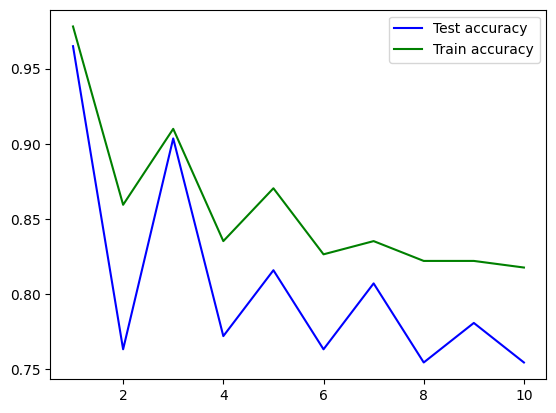

In [17]:
acc_te = []
acc_tr = []
degree_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for deg in degree_list:
    model = SVC(kernel='poly', degree=deg)
    model.fit(X_train, y_train)
    y_pre_te = model.predict(X_test)
    y_pre_tr = model.predict(X_train)
    acc_te.append(accuracy_score(y_test, y_pre_te))
    acc_tr.append(accuracy_score(y_train, y_pre_tr))

plt.plot(degree_list, acc_te, 'b-')
plt.plot(degree_list, acc_tr, 'g-')
plt.legend(['Test accuracy', 'Train accuracy'])
plt.show()

In [19]:
model = SVC(kernel='poly', degree=1)
model.fit(X_train, y_train)
y_pre_te = model.predict(X_test)
y_pre_tr = model.predict(X_train)
confusion_matrix(y_test, y_pre_te)

array([[44,  3],
       [ 1, 66]], dtype=int64)